![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Generate forcing in eWaterCycle with ESMValTool

This notebooks shows how to generate forcing data for Wflow model using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html#wflow). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import logging
import warnings
from pathlib import Path

warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [2]:
import xarray as xr
from rich import print

import ewatercycle.forcing

Forcing for Wflow is created using the ESMValTool recipe. It produces one file that contains three variables: temperature, precipitation, and potential evapotranspiration. You can set the start and end date, and the region. See [eWaterCycle documentation](https://ewatercycle.readthedocs.io/en/latest/apidocs/ewatercycle.forcing.html#submodules) for more information. 

To download `wflow_dem.map`, see the [instructions](https://ewatercycle.readthedocs.io/en/latest/system_setup.html#download-example-parameter-sets).

In [3]:
camelsgb_forcing = ewatercycle.forcing.sources['CaravanForcing'].generate(start_time = "1997-08-01T00:00:00Z",
                                                               end_time = "2000-08-31T00:00:00Z",
                                                               directory = "/home/rhut/Forcing",
                                                               basin_id = "camelsgb_73010",
                                                                 )


In [5]:
wflow_forcing = ewatercycle.forcing.sources["WflowForcing"].generate(
    dataset="ERA5",
    start_time="1990-01-01T00:00:00Z",
    end_time="1990-12-31T00:00:00Z",
    shape=camelsgb_forcing.shape,
    dem_file=str(Path("/home/rhut/wflow_dem.map").absolute()),
)

In [6]:
print(wflow_forcing)

WflowForcing(
    start_time='1990-01-01T00:00:00Z',
    end_time='1990-12-31T00:00:00Z',
    directory=PosixPath('/home/rhut/repos/eurocsdms_ewatercycle_workshop/book/oneModel/esmvaltool_output/ewcrepa4iq
5aos_20241023_083030/work/diagnostic/script'),
    shape=PosixPath('/home/rhut/Forcing/camelsgb_73010.shp'),
    filenames={},
    netcdfinput='wflow_ERA5_camelsgb_73010_1990_1990.nc',
    Precipitation='/pr',
    EvapoTranspiration='/pet',
    Temperature='/tas',
    Inflow=None
)

### Plot forcing

<xarray.Dataset> Size: 138MB
Dimensions:    (time: 365, lat: 169, lon: 187, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 3kB 1990-01-01T12:00:00 ... 1990-12-31T1...
  * lat        (lat) float64 1kB 52.05 52.02 51.98 51.94 ... 45.97 45.93 45.89
  * lon        (lon) float64 1kB 5.227 5.264 5.3 5.337 ... 11.97 12.01 12.05
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 46MB nan nan nan nan ... nan nan nan nan
    time_bnds  (time, bnds) datetime64[ns] 6kB 1990-01-01 ... 1991-01-01
    lat_bnds   (lat, bnds) float64 3kB 52.07 52.04 52.04 ... 45.91 45.91 45.88
    lon_bnds   (lon, bnds) float64 3kB 5.209 5.245 5.245 ... 12.03 12.03 12.07
    tas        (time, lat, lon) float32 46MB nan nan nan nan ... nan nan nan nan
    pet        (time, lat, lon) float32 46MB nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.7
    software:     Created with ESMValTool v2.11.0
    caption:      Forcings for the wflow hydrological model.

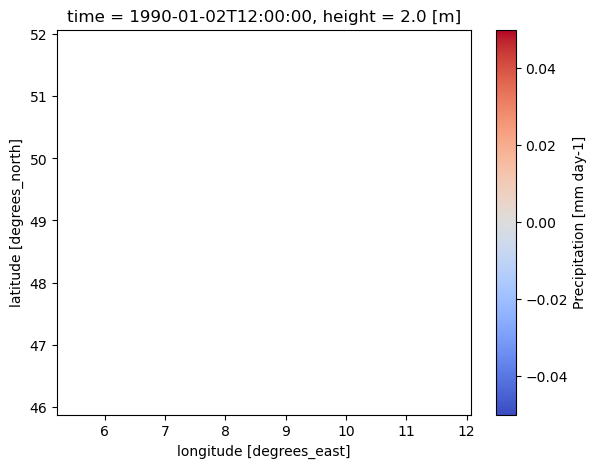

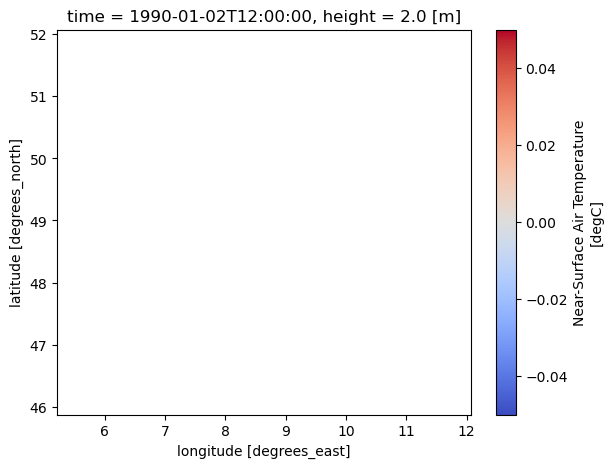

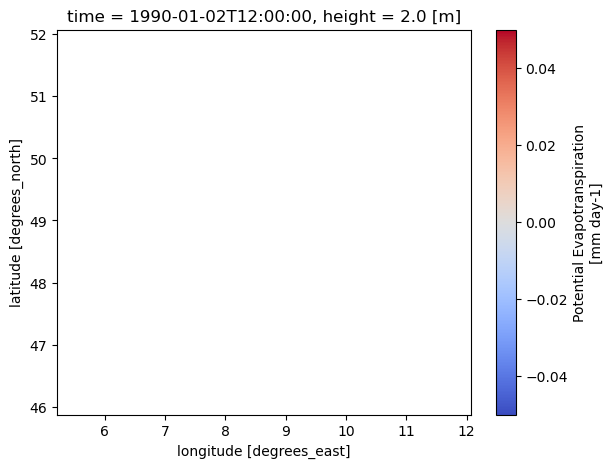

In [7]:
dataset = xr.load_dataset(f"{wflow_forcing.directory}/{wflow_forcing.netcdfinput}")
print(dataset)
for var in ["pr", "tas", "pet"]:
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)